In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther233_93.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther37_110.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther228_91.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther92_145.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther40_113.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther196_69.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther159_45.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther129_24.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther182_63.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Ale

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from PIL import Image
from skimage.transform import resize
from random import shuffle
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from keras import applications
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
directory = '../input/pins-face-recognition/105_classes_pins_dataset'

In [4]:
Name=[]
for file in os.listdir(directory):
    Name.append(file[5:])
print(Name)
print(len(Name))

['Alex Lawther', 'Logan Lerman', 'Maria Pedraza', 'Anthony Mackie', 'Bobby Morley', 'Chris Evans', 'Chris Pratt', 'Mark Zuckerberg', 'Anne Hathaway', 'Emilia Clarke', 'Cristiano Ronaldo', 'Josh Radnor', 'Henry Cavil', 'Zoe Saldana', 'ellen page', 'Gwyneth Paltrow', 'Natalie Dormer', 'barbara palvin', 'Krysten Ritter', 'elon musk', 'Leonardo DiCaprio', 'Bill Gates', 'elizabeth olsen', 'Megan Fox', 'Taylor Swift', 'Tom Hiddleston', 'Jeremy Renner', 'melissa fumero', 'Robert Downey Jr', 'amber heard', 'Jake Mcdorman', 'Robert De Niro', 'grant gustin', 'Jennifer Lawrence', 'Eliza Taylor', 'scarlett johansson', 'Marie Avgeropoulos', 'Brenton Thwaites', 'Adriana Lima', 'Amanda Crew', 'Hugh Jackman', 'Katherine Langford', 'camila mendes', 'Selena Gomez', 'Avril Lavigne', 'jeff bezos', 'Jimmy Fallon', 'Christian Bale', 'Shakira Isabel Mebarak', 'Alvaro Morte', 'Lindsey Morgan', 'Zac Efron', 'Dominic Purcell', 'barack obama', 'Tom Holland', 'Emma Stone', 'Tom Hardy', 'Sophie Turner', 'Tuppence 

In [5]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

print(dict(zip(Name,N)))

{'Alex Lawther': 0, 'Logan Lerman': 1, 'Maria Pedraza': 2, 'Anthony Mackie': 3, 'Bobby Morley': 4, 'Chris Evans': 5, 'Chris Pratt': 6, 'Mark Zuckerberg': 7, 'Anne Hathaway': 8, 'Emilia Clarke': 9, 'Cristiano Ronaldo': 10, 'Josh Radnor': 11, 'Henry Cavil': 12, 'Zoe Saldana': 13, 'ellen page': 14, 'Gwyneth Paltrow': 15, 'Natalie Dormer': 16, 'barbara palvin': 17, 'Krysten Ritter': 18, 'elon musk': 19, 'Leonardo DiCaprio': 20, 'Bill Gates': 21, 'elizabeth olsen': 22, 'Megan Fox': 23, 'Taylor Swift': 24, 'Tom Hiddleston': 25, 'Jeremy Renner': 26, 'melissa fumero': 27, 'Robert Downey Jr': 28, 'amber heard': 29, 'Jake Mcdorman': 30, 'Robert De Niro': 31, 'grant gustin': 32, 'Jennifer Lawrence': 33, 'Eliza Taylor': 34, 'scarlett johansson': 35, 'Marie Avgeropoulos': 36, 'Brenton Thwaites': 37, 'Adriana Lima': 38, 'Amanda Crew': 39, 'Hugh Jackman': 40, 'Katherine Langford': 41, 'camila mendes': 42, 'Selena Gomez': 43, 'Avril Lavigne': 44, 'jeff bezos': 45, 'Jimmy Fallon': 46, 'Christian Bale':

In [6]:
dataset=[]
testset=[]
count=0
for file in os.listdir(directory):
    path=os.path.join(directory,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(120,120))
        image=img_to_array(image)
        image=image/255.0
        t+=1
        print(t)
        if t<=100:
            dataset.append([image,count])
        else:
            testset.append([image,count])
    count+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152


In [7]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [8]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)
print(data,labels)

[[[[0.7764706  0.8392157  0.827451  ]
   [0.9529412  0.9764706  0.92941177]
   [0.972549   0.98039216 0.92941177]
   ...
   [0.3019608  0.4627451  0.5803922 ]
   [0.29803923 0.45882353 0.5764706 ]
   [0.2901961  0.4509804  0.5686275 ]]

  [[0.80784315 0.87058824 0.85882354]
   [0.9490196  0.972549   0.9254902 ]
   [0.972549   0.98039216 0.92941177]
   ...
   [0.3137255  0.48235294 0.60784316]
   [0.31764707 0.4862745  0.6117647 ]
   [0.3137255  0.48235294 0.60784316]]

  [[0.8156863  0.8784314  0.8666667 ]
   [0.9490196  0.972549   0.9254902 ]
   [0.972549   0.98039216 0.9372549 ]
   ...
   [0.32156864 0.49411765 0.6313726 ]
   [0.3254902  0.49803922 0.63529414]
   [0.32156864 0.49803922 0.627451  ]]

  ...

  [[0.99215686 0.9764706  0.92941177]
   [0.99215686 0.9764706  0.92941177]
   [1.         0.9764706  0.92941177]
   ...
   [0.3529412  0.32156864 0.2784314 ]
   [0.40392157 0.3882353  0.3529412 ]
   [0.5803922  0.58431375 0.5647059 ]]

  [[0.99215686 0.9764706  0.92941177]
   [0.9

In [9]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [10]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [11]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(8383, 120, 120, 3)
(2096, 120, 120, 3)
(8383, 105)
(2096, 105)


In [12]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [13]:
nclass = len(Name)

base_model = applications.InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(120,120,3))

for layer in base_model.layers[:-2]:
    layer.trainable = False 
#base_model.trainable = False

add_model = Sequential()
add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dense(nclass, 
                    activation='softmax'))

model = add_model
model.compile(loss='categorical_crossentropy', 
              optimizer="adam",
              metrics=['accuracy'])
model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 105)               215145    
Total params: 22,017,929
Trainable params: 215,145
Non-trainable params: 21,802,784
_________________________________________________________________


In [14]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30)

Epoch 1/30
262/262 [==============================] - 143s 527ms/step - loss: 5.8353 - accuracy: 0.0347 - val_loss: 4.3911 - val_accuracy: 0.0878
Epoch 2/30
262/262 [==============================] - 134s 510ms/step - loss: 4.6876 - accuracy: 0.0866 - val_loss: 4.2335 - val_accuracy: 0.1112
Epoch 3/30
262/262 [==============================] - 134s 511ms/step - loss: 4.5299 - accuracy: 0.1111 - val_loss: 4.1045 - val_accuracy: 0.1302
Epoch 4/30
262/262 [==============================] - 134s 510ms/step - loss: 4.3645 - accuracy: 0.1269 - val_loss: 4.0829 - val_accuracy: 0.1407
Epoch 5/30
262/262 [==============================] - 133s 508ms/step - loss: 4.3533 - accuracy: 0.1273 - val_loss: 4.1545 - val_accuracy: 0.1627
Epoch 6/30
262/262 [==============================] - 133s 508ms/step - loss: 4.2671 - accuracy: 0.1416 - val_loss: 4.0515 - val_accuracy: 0.1570
Epoch 7/30
262/262 [==============================] - 133s 509ms/step - loss: 4.1748 - accuracy: 0.1559 - val_loss: 4.0650 -

In [15]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1) 
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.32      0.43      0.37        21
           1       0.33      0.14      0.20        14
           2       0.21      0.16      0.18        25
           3       0.47      0.76      0.58        21
           4       0.43      0.16      0.23        19
           5       0.10      0.08      0.09        13
           6       0.25      0.14      0.18        21
           7       0.20      0.31      0.24        16
           8       0.21      0.14      0.17        21
           9       0.06      0.30      0.10        20
          10       0.32      0.39      0.35        23
          11       0.29      0.08      0.12        25
          12       0.16      0.14      0.15        21
          13       0.22      0.23      0.23        26
          14       0.03      0.05      0.04        19
          15       0.57      0.24      0.33        17
          16       0.19      0.36      0.25        25
          17       0.20    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


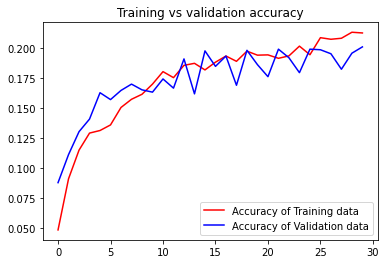

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

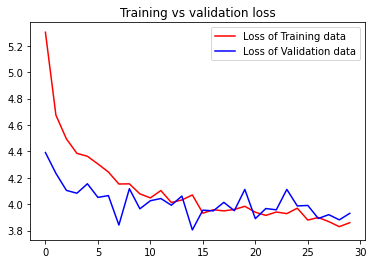

<Figure size 432x288 with 0 Axes>

In [17]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

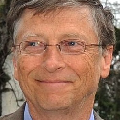

In [18]:
load_img("../input/pins-face-recognition/105_classes_pins_dataset/pins_Bill Gates/Bill Gates153_528.jpg",target_size=(120,120))

In [19]:
image=load_img("../input/pins-face-recognition/105_classes_pins_dataset/pins_Bill Gates/Bill Gates153_528.jpg",target_size=(120,120))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [20]:
def mapper(value):
    return reverse_mapping[value]

prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
#print(prediction)
#print(value)
print("Prediction is {}.".format(move_name))

Prediction is Bill Gates.
